# 🌩️ HMS - Exploratory Data Analysis and Journey in Neurocritical Care 🌍

## 1. Understanding the EEG Domain

<span style="color:#3498db;">**What is Electroencephalography (EEG)?**</span> Electroencephalography, commonly referred to as EEG, is a non-invasive method used to record electrical activity in the brain. This technique involves placing electrodes on the scalp, which detect tiny electrical charges that result from the activity of brain cells. The signals captured by these electrodes are amplified and recorded, typically resulting in a series of wavy lines that are analyzed by specialists.

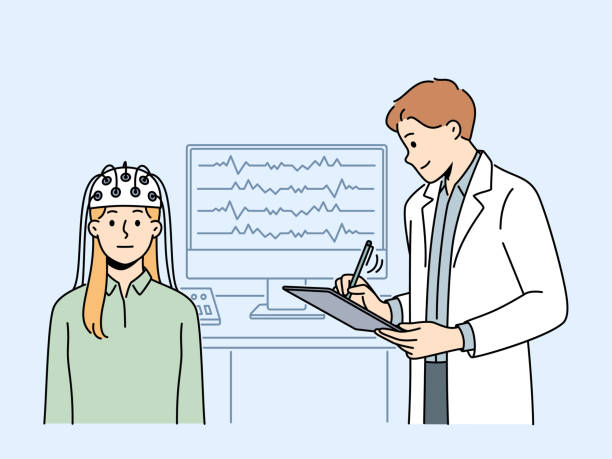

<span style="color:#3498db;">**How Electroencephalography Data Looks Like?**</span> Electroencephalography (EEG) data typically appears as a series of wavy lines, each representing the electrical activity recorded from different electrodes placed on the scalp. These lines, called traces, show the voltage changes over time. The patterns observed in EEG data are influenced by the brain activity of the individual, and they can vary significantly depending on the state of consciousness, activity, or any neurological conditions.

<span style="color:#3498db;">**What Patterns May Be Observed in the EEG Data?**</span>
- **Wave Patterns:** EEG data is characterized by different types of wave patterns, such as alpha, beta, delta, and theta waves. Each type corresponds to different brain states. For example, alpha waves are often associated with a state of relaxation, while beta waves are linked with active thinking or concentration.
- **Amplitude and Frequency:** The waves have varying amplitudes (heights) and frequencies (speeds). The amplitude indicates the strength of the signal, and frequency shows how fast the brain waves are oscillating.
- **Artifacts:** These are non-brain waveforms that can appear in the data due to muscle movements, eye blinks, or electrical interference.
- **Abnormal Patterns:** In cases of neurological disorders like epilepsy, the EEG may show spikes, sharp waves, or other unusual patterns that indicate abnormal brain activity.

<span style="color:#3498db;">**How Spectrograms are Related to EEG?**</span>
- **Frequency Analysis:** EEG signals consist of brain waves with different frequencies, like alpha, beta, theta, and delta waves. A spectrogram can visually display these frequencies, showing how they change over time during the EEG recording.
- **Identifying Patterns:** Spectrograms can help in identifying patterns that might not be easily discernible in the raw EEG waveforms. For example, they can be used to detect changes in brain activity during different sleep stages or to identify oscillatory activity associated with certain neurological disorders, like epilepsy.
- **Temporal and Frequency Resolution:** A key advantage of spectrograms in EEG analysis is their ability to provide information about both the timing (temporal resolution) and the frequency (frequency resolution) of brain waves. This is crucial for understanding dynamic changes in brain activity.
- **Data Visualization:** Spectrograms offer a more intuitive way to visualize and interpret complex EEG data. They can transform the EEG's time-domain data into a more accessible frequency-domain representation, which can be easier to analyze and understand, especially in research and clinical diagnostics.

<span style="color:#3498db;">**What is LPD/GPD/LRDA/GRDA Conditions and How They May Be Seen in Data?**</span>

### Lateralized Periodic Discharges (LPDs)
- **Lateralization:** LPDs are lateralized, meaning they predominantly occur on one side (hemisphere) of the brain.
- **Periodicity:** LPDs are periodic, meaning they display a repeating pattern. This periodicity is a key feature in their identification on an EEG.
- **Waveform Characteristics:** LPDs typically consist of sharp waveforms or complexes that are clearly distinguishable from the background EEG activity. These sharp waves are usually followed by a slow-wave component.
- **General Characteristics:** In EEG data, LPDs appear as regular, sharply contoured waveforms that stand out against the background brain activity and repeat at consistent intervals. They are usually unilateral, affecting either the left or right hemisphere, which is an important aspect in their interpretation.

### Generalized Periodic Discharges (GPDs)
- **Generalized Distribution:** GPDs are characterized by their distribution across both hemispheres of the brain, rather than being localized to one side.
- **Periodicity:** Like LPDs, GPDs exhibit a repeating pattern. Their periodic nature is crucial for their identification on EEG and distinguishes them from other generalized EEG abnormalities.
- **Waveform Characteristics:** GPDs usually consist of repetitive, sharply contoured waveforms that can vary in shape and duration. They are often more synchronized compared to other EEG patterns.
- **Clinical Implications:** GPDs may be seen in various clinical scenarios, including severe diffuse brain injury, hypoxic-ischemic encephalopathy, and in association with certain drug toxicities or metabolic derangements. Their presence can indicate a severe underlying brain dysfunction.

### Lateralized Rhythmic Delta Activity (LRDA)
- **Lateralization:** The key feature of LRDA is its lateralized nature, affecting predominantly one hemisphere of the brain, which can be crucial in localizing a neurological lesion or dysfunction.
- **Rhythmic Delta Waves:** Unlike the sharp waveforms of LPDs, LRDA is defined by smoother, more rhythmic waveforms, predominantly in the delta frequency range (1-4 Hz).
- **Clinical Context:** LRDA is often observed in patients with focal brain lesions, such as those caused by stroke, tumors, or inflammation. It may also be seen in the context of focal seizure activity.
- **Interpretation:** The presence of LRDA in an EEG reading can provide valuable information regarding the location and possibly the nature of brain pathology, aiding in diagnosis and treatment planning.

### Generalized Rhythmic Delta Activity (GRDA)
- **Generalized Distribution:** GRDA differs from LRDA in that it is not lateralized but involves both hemispheres, often symmetrically.
- **Rhythmic Delta Waves:** This pattern is defined by continuous or quasi-continuous rhythmic delta waves. The activity is slower and more rhythmic compared to GPDs.
- **Associated Conditions:** GRDA can be seen in various clinical conditions, including encephalopathies of different etiologies (like toxic-metabolic disturbances), and in some cases, during certain sleep stages or in diffuse brain disorders.
- **Diagnostic Significance:** The presence of GRDA can be indicative of a global brain dysfunction and may warrant further investigation to identify its cause. It is particularly significant in assessing patients with altered levels of consciousness or diffuse neurological impairments.

**Disclaimer:** I'm not an expert in this domain. For a more detailed explanation from the competition host, read this [paper](https://www.acns.org/UserFiles/file/ACNSStandardizedCriticalCareEEGTerminology_rev2021.pdf). If you have questions or you think I'm wrong somewhere, feel free to leave a comment. And don't forget to upvote 😉.


In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File Paths
train_path = '/kaggle/input/hms-harmful-brain-activity-classification/train.csv'
test_path = '/kaggle/input/hms-harmful-brain-activity-classification/test.csv'
sample_submission_path = '/kaggle/input/hms-harmful-brain-activity-classification/sample_submission.csv'

In [3]:
# Load Train, Test, and Sample Submission Data
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
sample_submission_data = pd.read_csv(sample_submission_path)

In [4]:
# Display General Information about Train Data
print("Train Data General Information:")
print(train_data.info())

Train Data General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   eeg_id                            0 non-null      object
 1   eeg_sub_id                        0 non-null      object
 2   eeg_label_offset_seconds          0 non-null      object
 3   spectrogram_id                    0 non-null      object
 4   spectrogram_sub_id                0 non-null      object
 5   spectrogram_label_offset_seconds  0 non-null      object
 6   label_id                          0 non-null      object
 7   patient_id                        0 non-null      object
 8   expert_consensus                  0 non-null      object
 9   seizure_vote                      0 non-null      object
 10  lpd_vote                          0 non-null      object
 11  gpd_vote                          0 non-null      object
 12  lr

In [5]:
# Display General Information about Test Data
print("\nTest Data General Information:")
print(test_data.info())


Test Data General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   spectrogram_id  1 non-null      int64
 1   eeg_id          1 non-null      int64
 2   patient_id      1 non-null      int64
dtypes: int64(3)
memory usage: 152.0 bytes
None


In [6]:
# Display General Information about Sample Submission Data
print("\nSample Submission Data General Information:")
print(sample_submission_data.info())


Sample Submission Data General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eeg_id        1 non-null      int64  
 1   seizure_vote  1 non-null      float64
 2   lpd_vote      1 non-null      float64
 3   gpd_vote      1 non-null      float64
 4   lrda_vote     1 non-null      float64
 5   grda_vote     1 non-null      float64
 6   other_vote    1 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 184.0 bytes
None


In [7]:
# Display First Few Rows of Train Data
print("\nFirst Few Rows of Train Data:")
print(train_data.head())


First Few Rows of Train Data:
Empty DataFrame
Columns: [eeg_id, eeg_sub_id, eeg_label_offset_seconds, spectrogram_id, spectrogram_sub_id, spectrogram_label_offset_seconds, label_id, patient_id, expert_consensus, seizure_vote, lpd_vote, gpd_vote, lrda_vote, grda_vote, other_vote]
Index: []


In [8]:
# Display First Few Rows of Test Data
print("\nFirst Few Rows of Test Data:")
print(test_data.head())


First Few Rows of Test Data:
   spectrogram_id      eeg_id  patient_id
0          853520  3911565283        6885


In [9]:
# Display First Few Rows of Sample Submission Data
print("\nFirst Few Rows of Sample Submission Data:")
print(sample_submission_data.head())


First Few Rows of Sample Submission Data:
       eeg_id  seizure_vote  lpd_vote  gpd_vote  lrda_vote  grda_vote  \
0  3911565283      0.166667  0.166667  0.166667   0.166667   0.166667   

   other_vote  
0    0.166667  


In [10]:
# Display General Statistics of Train Data
print("Train Data Statistics:")
print(train_data.describe())

Train Data Statistics:
       eeg_id eeg_sub_id eeg_label_offset_seconds spectrogram_id  \
count       0          0                        0              0   
unique      0          0                        0              0   
top       NaN        NaN                      NaN            NaN   
freq      NaN        NaN                      NaN            NaN   

       spectrogram_sub_id spectrogram_label_offset_seconds label_id  \
count                   0                                0        0   
unique                  0                                0        0   
top                   NaN                              NaN      NaN   
freq                  NaN                              NaN      NaN   

       patient_id expert_consensus seizure_vote lpd_vote gpd_vote lrda_vote  \
count           0                0            0        0        0         0   
unique          0                0            0        0        0         0   
top           NaN              NaN         

# Explore train EEGs

In [11]:
import pyarrow.parquet as pq

In [12]:
# Path to the file you want to load
file_path = '/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/1001369401.parquet'

In [13]:
# Load the Parquet file
eeg_data = pq.read_table(file_path).to_pandas()

# Explore the EEG data
print(eeg_data.head())

          Fp1          F3          C3          P3          F7          T3  \
0 -590.419983 -557.659973 -478.279999 -586.659973 -576.590027 -537.460022   
1 -587.760010 -563.630005 -481.760010 -589.859985 -579.710022 -537.369995   
2 -590.479980 -563.960022 -482.040009 -588.679993 -574.159973 -532.340027   
3 -593.179993 -563.260010 -476.160004 -582.909973 -565.640015 -520.799988   
4 -588.820007 -556.729980 -470.410004 -573.299988 -556.789978 -519.239990   

           T5          O1          Fz          Cz          Pz         Fp2  \
0 -554.330017 -605.809998 -560.599976 -526.630005 -557.299988 -551.030029   
1 -556.320007 -609.349976 -563.710022 -530.549988 -561.549988 -557.030029   
2 -550.179993 -606.450012 -568.270020 -534.049988 -563.059998 -555.969971   
3 -544.150024 -600.869995 -568.190002 -530.250000 -558.789978 -559.809998   
4 -537.080017 -589.690002 -560.070007 -520.919983 -548.849976 -557.869995   

           F4          C4          P4          F8          T4          T6 

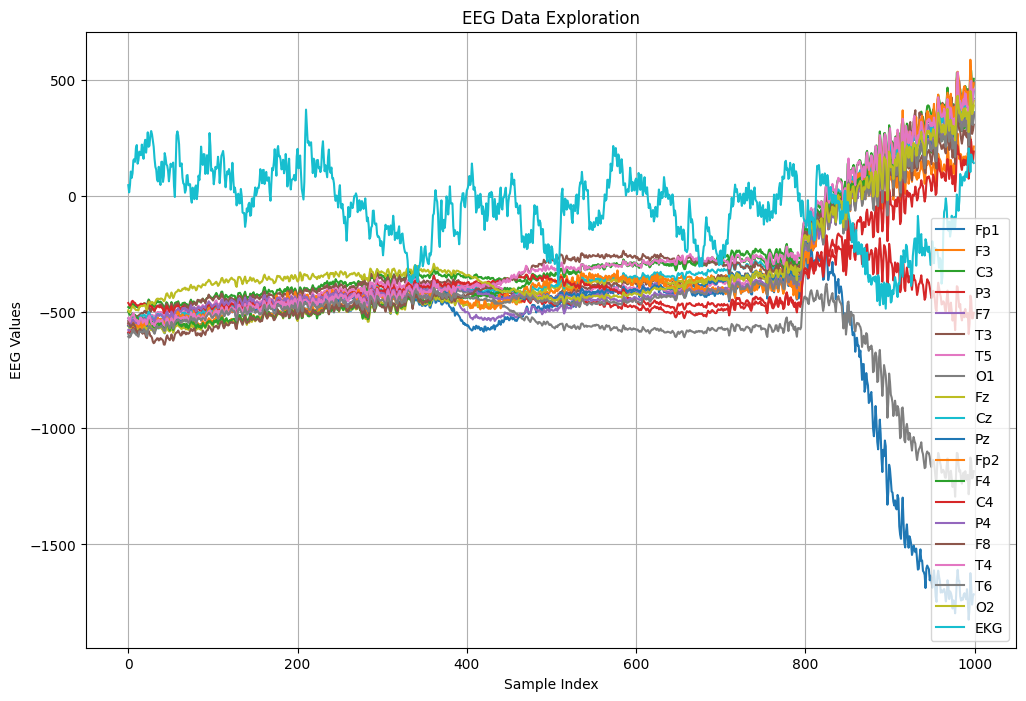

In [14]:
# Plot the EEG data for the first 1000 samples
num_samples_to_plot = 1000

fig, ax = plt.subplots(figsize=(12, 8))

for column in eeg_data.columns:
    ax.plot(eeg_data.index[:num_samples_to_plot], eeg_data[column][:num_samples_to_plot], label=column)

ax.set_title('EEG Data Exploration')
ax.set_xlabel('Sample Index')
ax.set_ylabel('EEG Values')
ax.legend()
ax.grid(True)  # Add grid lines for better readability

plt.show()


In [15]:
# Frequency Analysis
def plot_frequency_spectrum(eeg_data, sampling_rate=1000):
    n = len(eeg_data)
    k = np.arange(n)
    T = n / sampling_rate
    frq = k / T
    frq = frq[range(n//2)]

    fft_values = np.fft.fft(eeg_data.values)
    fft_values = fft_values[range(n//2)]

    plt.figure(figsize=(12, 6))
    plt.plot(frq, abs(fft_values))
    plt.title('Frequency Spectrum of EEG Data')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

In [16]:
# Temporal Analysis
def plot_temporal_analysis(eeg_data):
    plt.figure(figsize=(12, 6))
    for column in eeg_data.columns:
        plt.plot(eeg_data.index, eeg_data[column], label=column)

    plt.title('Temporal Analysis of EEG Data')
    plt.xlabel('Sample Index')
    plt.ylabel('EEG Values')
    plt.legend()
    plt.show()

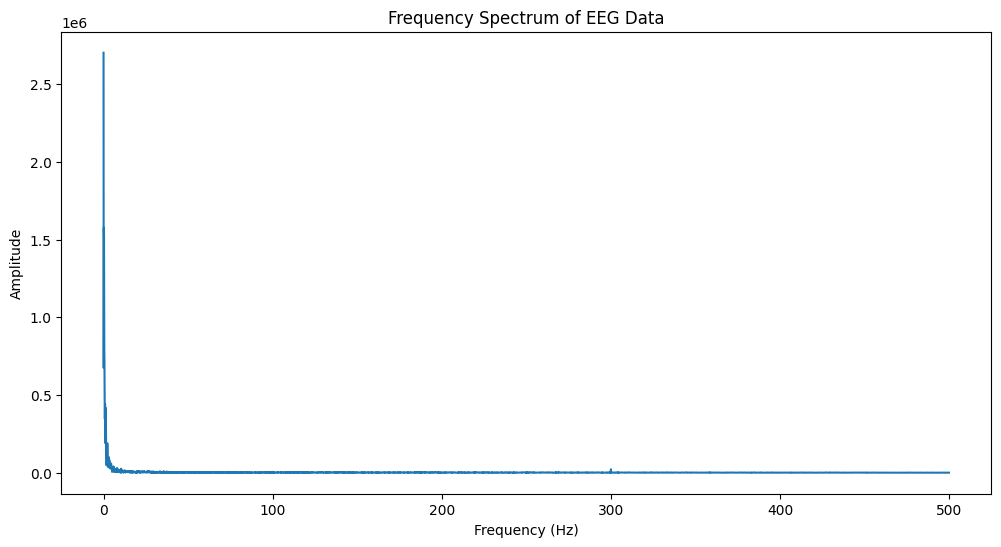

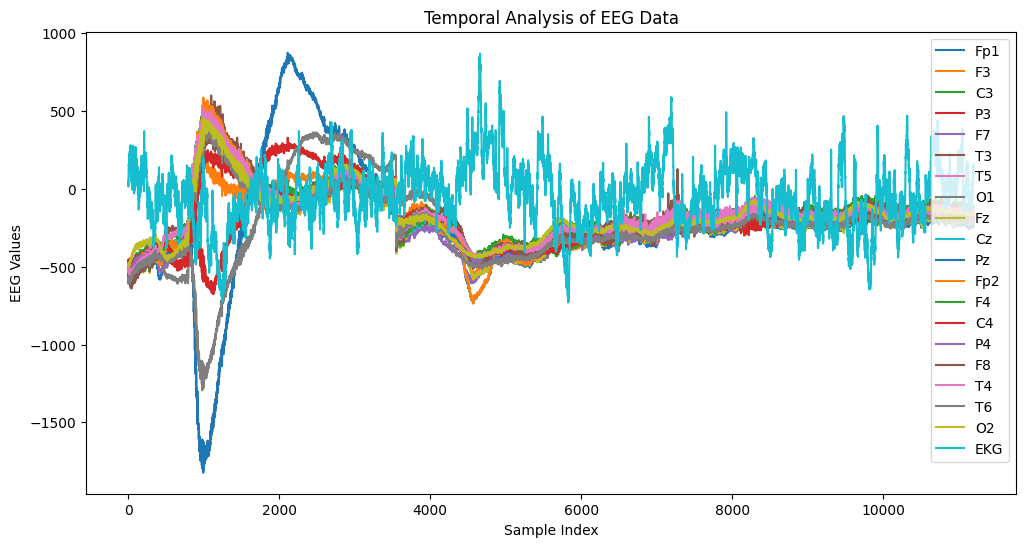

In [17]:
# Load EEG data
file_path = "/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/1001369401.parquet"
eeg_data = pq.read_table(file_path).to_pandas()

# Visualize Frequency Analysis
plot_frequency_spectrum(eeg_data.iloc[:, 0])

# Visualize Temporal Analysis
plot_temporal_analysis(eeg_data)

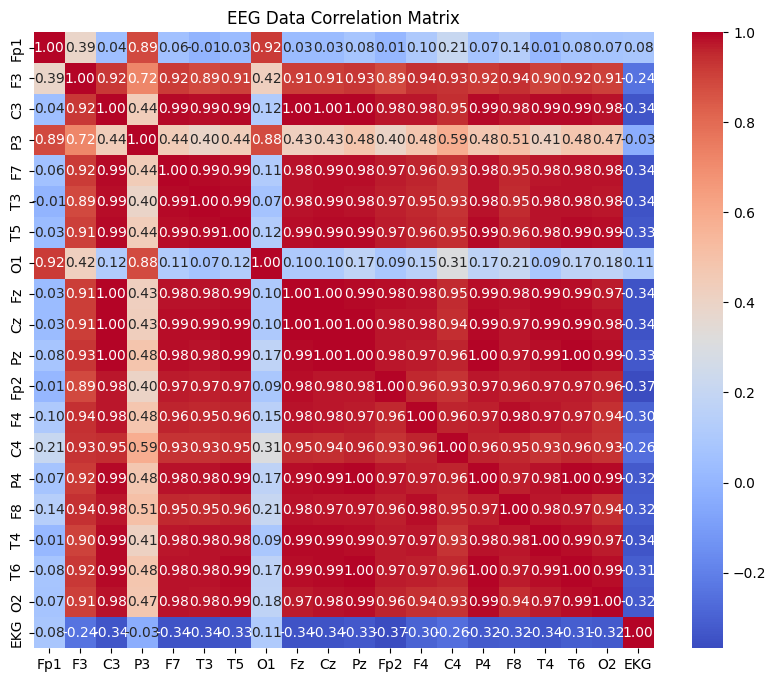

In [18]:
# EEG Data Correlation Matrix
correlation_matrix = eeg_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('EEG Data Correlation Matrix')
plt.show()

# Explore train spectrograms

In [19]:
# File path for the spectrogram in Parquet format
spectrogram_file_path = pd.read_parquet("/kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms/1000086677.parquet")
spectrogram_file_path

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,28.680000,53.990002,67.629997,59.880001,50.880001,74.309998,78.480003,63.080002,59.869999,...,0.13,0.14,0.08,0.11,0.04,0.03,0.05,0.05,0.04,0.05
1,3,29.639999,38.959999,44.009998,66.800003,48.509998,42.180000,47.340000,48.599998,40.880001,...,0.15,0.13,0.08,0.08,0.07,0.06,0.07,0.06,0.06,0.06
2,5,8.890000,9.020000,16.360001,23.559999,27.340000,30.040001,27.559999,23.290001,15.120000,...,0.12,0.11,0.08,0.08,0.09,0.10,0.12,0.14,0.13,0.14
3,7,1.770000,1.930000,1.810000,1.600000,1.430000,1.280000,1.190000,1.110000,1.010000,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.04
4,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,591,2.210000,2.280000,2.200000,1.280000,1.350000,1.930000,2.300000,2.440000,2.310000,...,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.03,0.03,0.03
296,593,2.490000,2.540000,2.150000,1.490000,1.360000,1.570000,1.970000,2.050000,1.890000,...,0.02,0.02,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0.01
297,595,0.240000,0.190000,0.210000,0.120000,0.110000,0.080000,0.060000,0.040000,0.040000,...,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00
298,597,0.990000,1.230000,1.370000,1.620000,1.940000,2.190000,2.270000,2.310000,2.300000,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01


In [20]:
# Basic Information
print(f"Spectrogram Shape: {spectrogram_file_path.shape}")
print(f"Minimum Intensity: {spectrogram_file_path.min().min()} dB")
print(f"Maximum Intensity: {spectrogram_file_path.max().max()} dB")
print(f"Average Intensity: {spectrogram_file_path.mean().mean()} dB")

Spectrogram Shape: (300, 401)
Minimum Intensity: 0.0 dB
Maximum Intensity: 206415.046875 dB
Average Intensity: 55.734953598339956 dB


In [21]:
def plot_spectrogram(spectrogram_path):
    sample_spect = pd.read_parquet(spectrogram_path)
    
    split_spect = {
        "LL": sample_spect.filter(regex='^LL', axis=1),
        "RL": sample_spect.filter(regex='^RL', axis=1),
        "RP": sample_spect.filter(regex='^RP', axis=1),
        "LP": sample_spect.filter(regex='^LP', axis=1),
    }
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    axes = axes.flatten()
    label_interval = 5
    for i, split_name in enumerate(split_spect.keys()):
        ax = axes[i]
        img = ax.imshow(np.log(split_spect[split_name]).T, cmap='viridis', aspect='auto', origin='lower')
        cbar = fig.colorbar(img, ax=ax)
        cbar.set_label('Log(Value)')
        ax.set_title(split_name)
        ax.set_ylabel("Frequency (Hz)")
        ax.set_xlabel("Time")

        ax.set_yticks(np.arange(len(split_spect[split_name].columns)))
        ax.set_yticklabels([column_name[3:] for column_name in split_spect[split_name].columns])
        frequencies = [column_name[3:] for column_name in split_spect[split_name].columns]
        ax.set_yticks(np.arange(0, len(split_spect[split_name].columns), label_interval))
        ax.set_yticklabels(frequencies[::label_interval])
    
    plt.tight_layout()
    plt.show()


/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


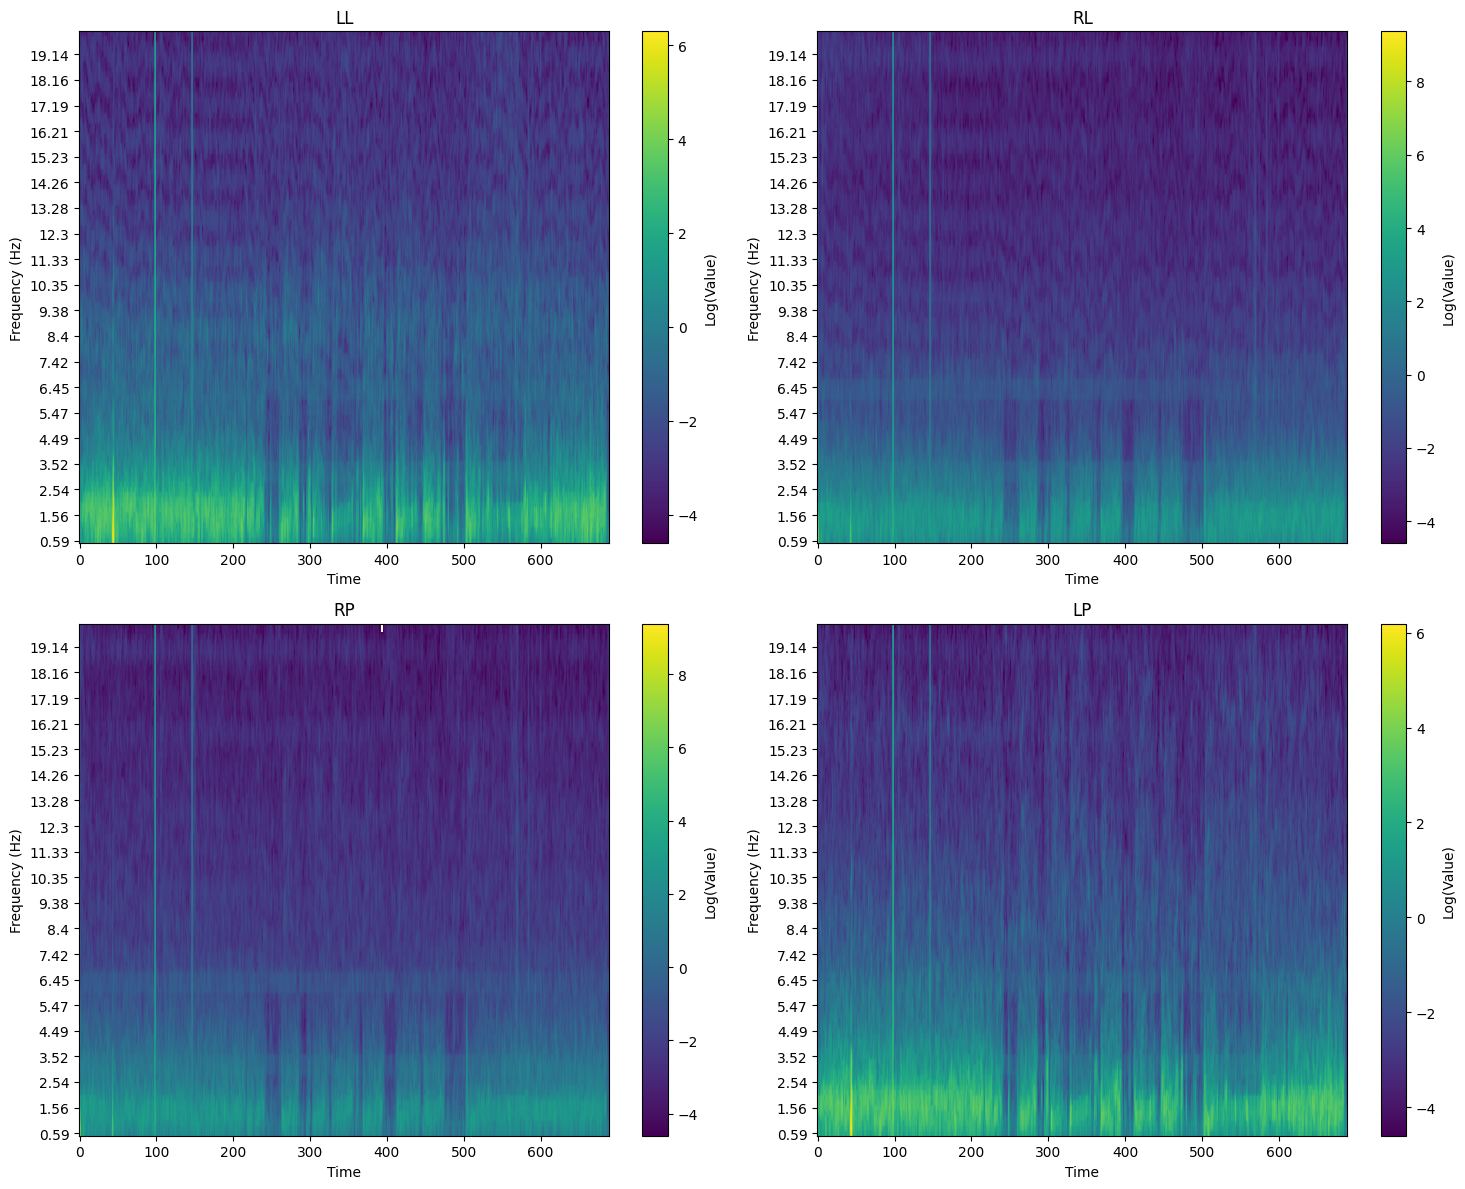

In [22]:
# Corrected function call
plot_spectrogram("/kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms/1000189855.parquet")


# 🔊 Listen to Spectrogram

In [23]:
!pip install librosa


In [24]:
import librosa.display
import librosa
import soundfile as sf  # Import soundfile module for writing WAV files

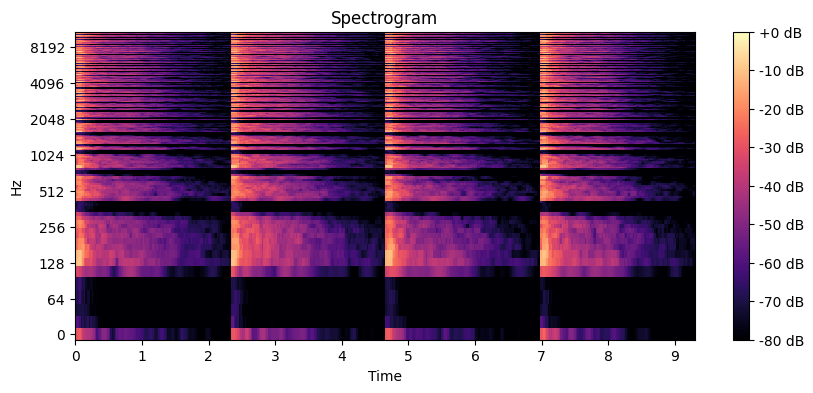

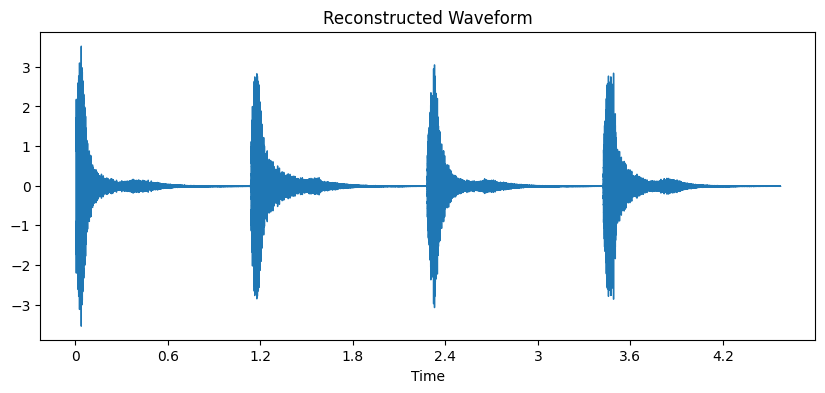

In [25]:
# Replace this with your actual Parquet file path
parquet_file_path = '/kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms/1001616430.parquet'

# Read the Parquet file into a DataFrame
df = pd.read_parquet(parquet_file_path)

# Extract the spectrogram data from the DataFrame
spectrogram = df.to_numpy()

# Assuming 'sr' is the sampling rate of your original audio
# Make sure to replace this with your actual sampling rate
sr = 22050

# Use librosa's iSTFT to convert the spectrogram back to a time-domain signal
audio_signal = librosa.istft(spectrogram)

# Display the original spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

# Display the reconstructed waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_signal, sr=sr)
plt.title('Reconstructed Waveform')
plt.show()

# Save the reconstructed waveform as an audio file
sf.write('reconstructed_audio.wav', audio_signal, sr)

In [26]:
from IPython.display import Audio

# Specify the path to the reconstructed audio file
reconstructed_audio_path = 'reconstructed_audio.wav'

# Play the reconstructed audio
Audio(reconstructed_audio_path)

# 📮 Final Submission


In [29]:
# Assuming you have predictions for each class from your model
# Replace these lines with your actual predictions
seizure_predictions = [0.2, 0.1, 0.3, 0.4, 0.5]  # Replace with your seizure predictions
lpd_predictions = [0.1, 0.2, 0.4, 0.3, 0.5]  # Replace with your LPD predictions
gpd_predictions = [0.3, 0.1, 0.2, 0.5, 0.4]  # Replace with your GPD predictions
lrda_predictions = [0.4, 0.5, 0.1, 0.2, 0.3]  # Replace with your LRDA predictions
grda_predictions = [0.5, 0.4, 0.3, 0.1, 0.2]  # Replace with your GRDA predictions

# Combine predictions into a DataFrame
predictions_df = pd.DataFrame({
    'seizure_vote': seizure_predictions,
    'lpd_vote': lpd_predictions,
    'gpd_vote': gpd_predictions,
    'lrda_vote': lrda_predictions,
    'grda_vote': grda_predictions,
    'other_vote': [0.0] * len(seizure_predictions)  # Add placeholder for 'other_vote'
})

# Add 'eeg_id' column from the test_df
predictions_df['eeg_id'] = test_data['eeg_id']

# Define the columns order
columns_order = ['eeg_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

# Reorder columns
predictions_df = predictions_df[columns_order]

# Normalize the predictions to sum up to 1 for each row
normalized_predictions = predictions_df.iloc[:, 1:].div(predictions_df.iloc[:, 1:].sum(axis=1), axis=0)
predictions_df.iloc[:, 1:] = normalized_predictions

# Save the predictions to a CSV file
predictions_df.to_csv("submission.csv", index=False)

# Display the final DataFrame
print(predictions_df)


         eeg_id  seizure_vote  lpd_vote  gpd_vote  lrda_vote  grda_vote  \
0  3.911565e+09      0.133333  0.066667  0.200000   0.266667   0.333333   
1           NaN      0.076923  0.153846  0.076923   0.384615   0.307692   
2           NaN      0.230769  0.307692  0.153846   0.076923   0.230769   
3           NaN      0.266667  0.200000  0.333333   0.133333   0.066667   
4           NaN      0.263158  0.263158  0.210526   0.157895   0.105263   

   other_vote  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
